In [1]:
# import libraries
import torch
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size':18})

In [2]:
# variable to evaluate over
x = torch.linspace(-3, 3, 101)
# Create a tensor 'x' that represents a range of values from -3 to 3, including 101 evenly spaced points.

# create a function that returns the activated output
def NNoutputx(actfun):
  # Define a function 'NNoutputx' that returns the activated output of a neural network given an activation function.

  # get activation function type
  # this code replaces torch.relu with torch.<actfun>
  actfun = getattr(torch, actfun)
  # Use the 'getattr' function to dynamically select an activation function based on the input 'actfun'.
  # For example, if 'actfun' is 'relu', this line would set 'actfun' to the PyTorch ReLU function.

  return actfun(x)
  # Apply the selected activation function to the tensor 'x' and return the result.


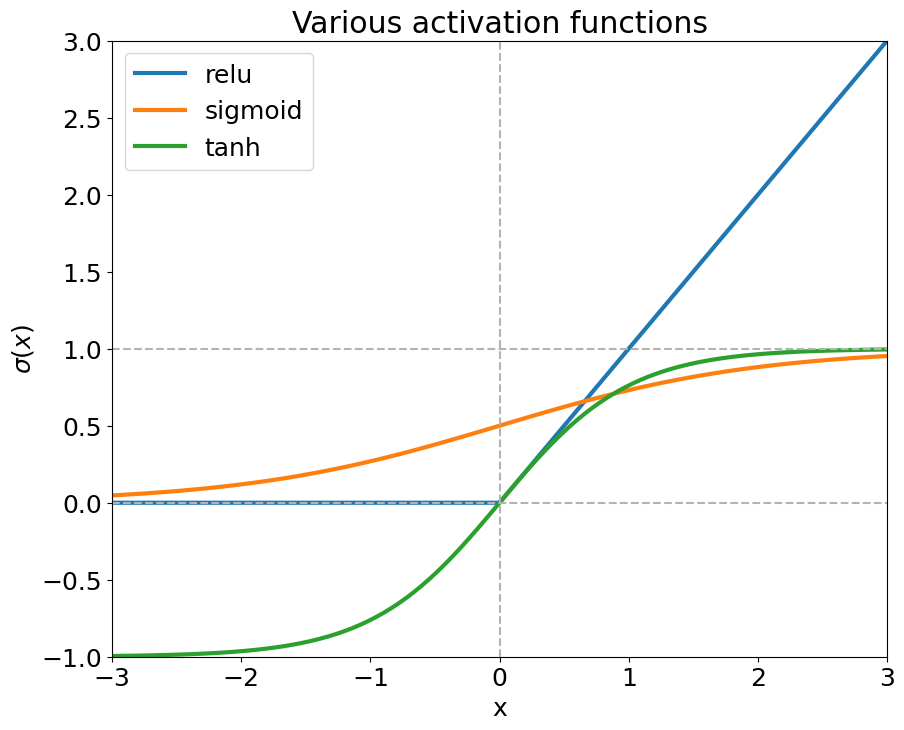

In [3]:
# the activation functions
activation_funs = ['relu', 'sigmoid', 'tanh']
# Create a list of activation function names to visualize: ReLU, sigmoid, and hyperbolic tangent (tanh).

fig = plt.figure(figsize=(10, 8))
# Create a new figure for plotting with a specified figure size.

for actfun in activation_funs:
  plt.plot(x, NNoutputx(actfun), label=actfun, linewidth=3)
  # For each activation function in the list:
  # - Plot the activated output using the 'NNoutputx' function for the specified activation function.
  # - Label the plot with the activation function name ('actfun') and set the line width.

# add reference lines
dashlinecol = [.7, .7, .7]
plt.plot(x[[0, -1]], [0, 0], '--', color=dashlinecol)
plt.plot(x[[0, -1]], [1, 1], '--', color=dashlinecol)
plt.plot([0, 0], [-1, 3], '--', color=dashlinecol)
# Add dashed reference lines to the plot for better visualization.

# make the plot look nicer
plt.legend()
# Add a legend to the plot to indicate which line corresponds to each activation function.
plt.xlabel('x')
# Set the x-axis label to 'x'.
plt.ylabel('$\sigma(x)$')
# Set the y-axis label to '$\sigma(x)$' (used for symbolic representation of activation functions).
plt.title('Various activation functions')
# Set the plot title to 'Various activation functions'.
plt.xlim(x[[0, -1]])
# Set the x-axis limits based on the minimum and maximum values in 'x'.
plt.ylim([-1, 3])
# Set the y-axis limits to [-1, 3] for better visualization.
plt.show()
# Display the plot.


# More activation functions in torch.nn

In [4]:
# create a function that returns the activated output FUNCTION
# this is different from the previous function
def NNoutput(actfun):
  # get activation function type
  # this code replaces torch.nn.relu with torch.nn.<actfun>
  actfun = getattr(torch.nn,actfun)
  return actfun()

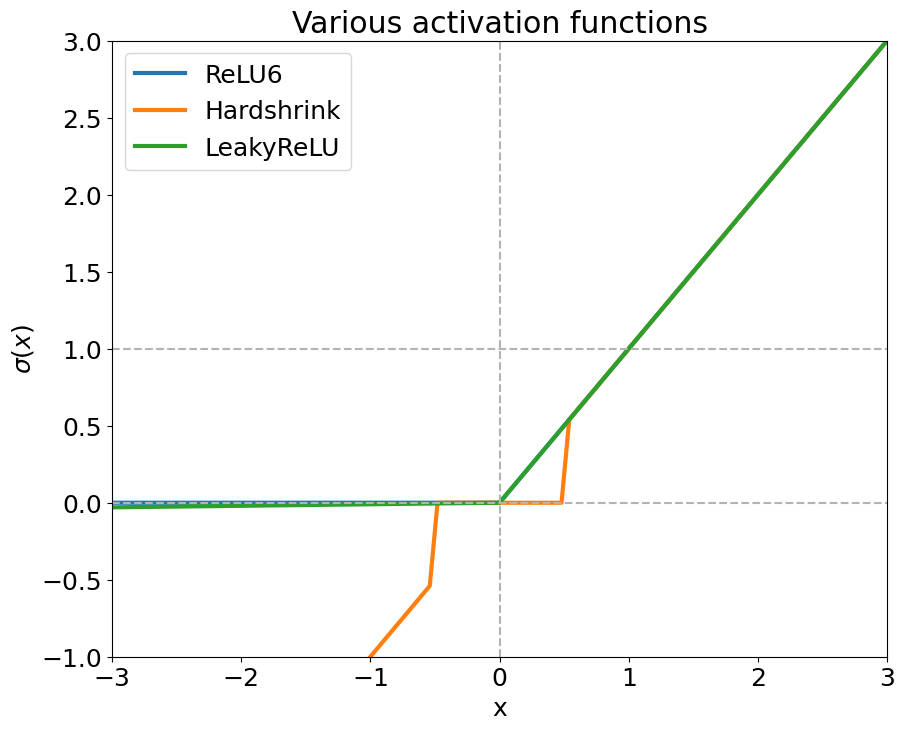

In [5]:
# the activation functions
activation_funs = [ 'ReLU6', 'Hardshrink', 'LeakyReLU' ]

fig = plt.figure(figsize=(10,8))

for actfun in activation_funs:
  plt.plot(x,NNoutput(actfun)(x),label=actfun,linewidth=3)

# add reference lines
dashlinecol = [.7,.7,.7]
plt.plot(x[[0,-1]],[0,0],'--',color=dashlinecol)
plt.plot(x[[0,-1]],[1,1],'--',color=dashlinecol)
plt.plot([0,0],[-1,3],'--',color=dashlinecol)

# make the plot look nicer
plt.legend()
plt.xlabel('x')
plt.ylabel('$\sigma(x)$')
plt.title('Various activation functions')
plt.xlim(x[[0,-1]])
plt.ylim([-1,3])
# plt.ylim([-.1,.1])
plt.show()

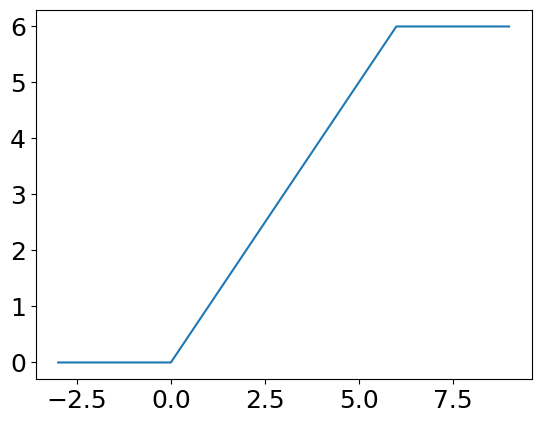

In [6]:
# relu6 in more detail
x = torch.linspace(-3,9,101)
relu6 = torch.nn.ReLU6()

plt.plot(x,relu6(x))
plt.show()

# Differences between torch and torch.nn

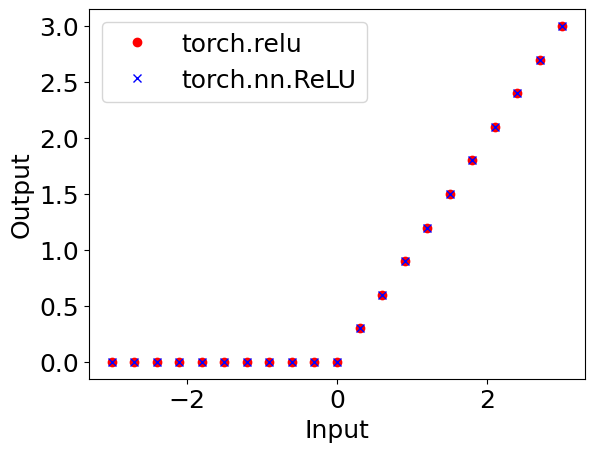

In [7]:
# redefine x (fewer points to facilitate visualization)
x = torch.linspace(-3,3,21)

# in torch
y1 = torch.relu(x)

# in torch.nn
f = torch.nn.ReLU()
y2 = f(x)


# the results are the same
plt.plot(x,y1,'ro',label='torch.relu')
plt.plot(x,y2,'bx',label='torch.nn.ReLU')
plt.legend()
plt.xlabel('Input')
plt.ylabel('Output')
plt.show()

In [ ]:
# List of activation functions in PyTorch:
#  https://pytorch.org/docs/stable/nn.html#non-linear-activations-weighted-sum-nonlinearity

# Additional explorations

In [ ]:
# The goal of these explorations is to help you appreciate the remarkably diverse nonlinear shapes that a node can produce.
# All explorations use the code below.

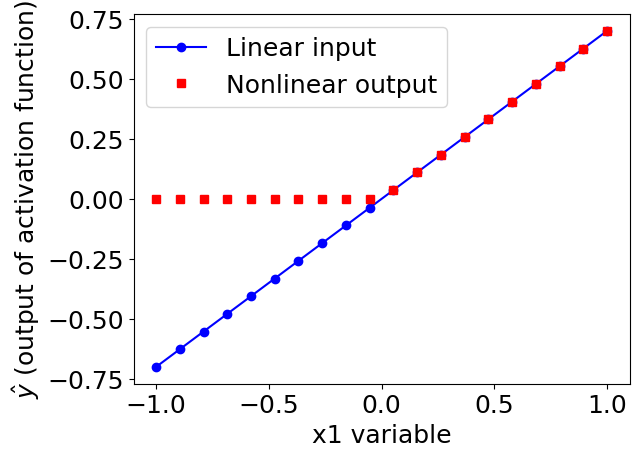

In [8]:
# create input vectors
x1 = torch.linspace(-1,1,20)
x2 = 2*x1

# and corresponding weights
w1 = -.3
w2 = .5

# their linear combination
linpart = x1*w1 + x2*w2

# and the nonlinear output
y = torch.relu(linpart)

# and plot!
plt.plot(x1,linpart,'bo-',label='Linear input')
plt.plot(x1,y,'rs',label='Nonlinear output')
plt.ylabel('$\\hat{y}$ (output of activation function)')
plt.xlabel('x1 variable')
# plt.ylim([-.1,.1]) # optional -- uncomment and modify to zoom in
plt.legend()
plt.show()

In [ ]:
# 1) Look through the code to make sure you understand what it does (linear weighted combination -> nonlinear function).
# 
# 2) Set x2=x1**2 and run the code. Then set one of the weights to be negative. Then set the negative weight to be close
#    to zero (e.g., -.01) with the positive weight relatively large (e.g., .8). Then swap the signs.
# 
# 3) Set x2=x1**2, and set the weights to be .4 and .6. Now set w2=.6 (you might want to zoom in on the y-axis).
# 
# 4) Set x2 to be the absolute value of x1 and both weights positive. Then set w2=-.6. Why does w2<0 have such a big impact?
#    More generally, under what conditions are the input and output identical? 
# 
# 5) Have fun! Spend a few minutes playing around with the code. Also try changing the activation function to tanh or 
#    anything else. The goal is to see that really simple input functions with really simple weights can produce really
#    complicated-looking nonlinear outputs.
# 